# Beer dataset Analysis

# Data Reading

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r"./train.csv")

In [8]:
df.head(10)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
5,14095,10.0,21436,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,served in a snifter; on-tap at CBC.\t\tcolor i...,"{'min': 16, 'hour': 1, 'mday': 20, 'sec': 9, '...",1324343769,NaN,NaN,NaN,NaN,perrymarcus
6,13759,12.6,10001,14,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,my 100th review on-tap! mini snifter\t\t A nut...,"{'min': 1, 'hour': 18, 'mday': 8, 'sec': 12, '...",1244484072,NaN,NaN,NaN,NaN,GratefulBeerGuy
7,3914,8.4,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,"{'min': 32, 'hour': 20, 'mday': 9, 'sec': 40, ...",1286656360,NaN,NaN,NaN,NaN,Daniellobo
8,47953,9.0,34361,394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,A snifter filled (several times over) from a 7...,"{'min': 26, 'hour': 3, 'mday': 16, 'sec': 13, ...",1279250773,NaN,NaN,NaN,Male,msubulldog25
9,7047,6.2,32676,1386,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,"Brewed with five hop additions, this alleged I...","{'min': 26, 'hour': 5, 'mday': 16, 'sec': 41, ...",1160976401,NaN,NaN,NaN,NaN,RedDiamond


In [9]:
df.rename(columns={'beer/ABV': 'beer_ABV', 'beer/beerId': 'beer_beerId', 'beer/brewerId': 'beer_brewerId', 'beer/name': 'beer_name', 'beer/style': 'beer_style', 'review/appearance': 'review_appearance', 'review/aroma': 'review_aroma', 'review/overall': 'review_overall', 'review/palate': 'review_palate', 'review/taste': 'review_taste', 'review/text': 'review_text', 'review/timeStruct': 'review_timeStruct', 'review/timeUnix': 'review_timeUnix', 'user/ageInSeconds': 'user_ageInSeconds', 'user/birthdayRaw': 'user_birthdayRaw','user/birthdayUnix': 'user_birthdayUnix','user/gender': 'user_gender','user/profileName': 'user_profileName'}, inplace=True)

In [10]:
df['index'] = df.index
df = df.reset_index(drop=True)

In [11]:
df.head(10)

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_text,review_timeStruct,review_timeUnix,user_ageInSeconds,user_birthdayRaw,user_birthdayUnix,user_gender,user_profileName
0,0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
5,5,10.0,21436,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,served in a snifter; on-tap at CBC.\t\tcolor i...,"{'min': 16, 'hour': 1, 'mday': 20, 'sec': 9, '...",1324343769,NaN,NaN,NaN,NaN,perrymarcus
6,6,12.6,10001,14,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,my 100th review on-tap! mini snifter\t\t A nut...,"{'min': 1, 'hour': 18, 'mday': 8, 'sec': 12, '...",1244484072,NaN,NaN,NaN,NaN,GratefulBeerGuy
7,7,8.4,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,"{'min': 32, 'hour': 20, 'mday': 9, 'sec': 40, ...",1286656360,NaN,NaN,NaN,NaN,Daniellobo
8,8,9.0,34361,394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,A snifter filled (several times over) from a 7...,"{'min': 26, 'hour': 3, 'mday': 16, 'sec': 13, ...",1279250773,NaN,NaN,NaN,Male,msubulldog25
9,9,6.2,32676,1386,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,"Brewed with five hop additions, this alleged I...","{'min': 26, 'hour': 5, 'mday': 16, 'sec': 41, ...",1160976401,NaN,NaN,NaN,NaN,RedDiamond


# Data Cleaning

In [12]:
df.isnull().sum()

index                    0
beer_ABV                 0
beer_beerId              0
beer_brewerId            0
beer_name                0
beer_style               0
review_appearance        0
review_aroma             0
review_overall           0
review_palate            0
review_taste             0
review_text             10
review_timeStruct        0
review_timeUnix          0
user_ageInSeconds    29644
user_birthdayRaw     29644
user_birthdayUnix    29644
user_gender          22186
user_profileName         5
dtype: int64

In [13]:
df.dtypes

index                  int64
beer_ABV             float64
beer_beerId            int64
beer_brewerId          int64
beer_name             object
beer_style            object
review_appearance    float64
review_aroma         float64
review_overall       float64
review_palate        float64
review_taste         float64
review_text           object
review_timeStruct     object
review_timeUnix        int64
user_ageInSeconds    float64
user_birthdayRaw      object
user_birthdayUnix    float64
user_gender           object
user_profileName      object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer_ABV           37500 non-null  float64
 2   beer_beerId        37500 non-null  int64  
 3   beer_brewerId      37500 non-null  int64  
 4   beer_name          37500 non-null  object 
 5   beer_style         37500 non-null  object 
 6   review_appearance  37500 non-null  float64
 7   review_aroma       37500 non-null  float64
 8   review_overall     37500 non-null  float64
 9   review_palate      37500 non-null  float64
 10  review_taste       37500 non-null  float64
 11  review_text        37490 non-null  object 
 12  review_timeStruct  37500 non-null  object 
 13  review_timeUnix    37500 non-null  int64  
 14  user_ageInSeconds  7856 non-null   float64
 15  user_birthdayRaw   7856 non-null   object 
 16  user_birthdayUnix  785

In [15]:
for i in df.columns:
    print(f"{i}: \n {df[i].unique()}")

index: 
 [    0     1     2 ... 37497 37498 37499]
beer_ABV: 
 [ 5.   11.    4.7   4.4  10.   12.6   8.4   9.    6.2   8.5  10.5  11.2
  7.    8.3   6.5   9.2   7.2   6.    5.5  12.    6.1   4.75  5.1   8.6
  6.6   6.9   4.2   6.8   5.4   7.75 10.2   9.4   4.8   7.7   9.5   7.82
  5.3   4.3   3.    8.   10.6   5.9   6.7   5.2   4.19  5.7   4.5   3.8
  4.6   3.5   4.    4.9   8.1   9.8   5.6   5.8   8.2   6.3   7.6   5.79
  7.5  14.   12.5  10.8   7.4  13.    6.4   7.1  10.4   9.1  11.1   5.59
 15.    3.75  5.25  5.11 11.3   7.3   3.6   8.9   8.8   2.4   9.7  10.9
  2.2   9.9   4.1   3.9   9.6   1.5  10.75 10.25 11.5   5.75  7.8   3.1
  4.55  2.5   7.9   4.25 11.9   3.7  39.44 16.   12.9  10.3   0.5   9.3
  2.8   8.7   5.47  6.25  4.37  8.25  0.1   3.2   7.26  7.25 14.5  43.
  8.85  6.32  3.4  12.8  57.7  30.86]
beer_beerId: 
 [46634  3003   961 ... 49959 71810 29697]
beer_brewerId: 
 [14338   395   365     1  1417    14 14879   394  1386  1199  6277 16386
  3268  1075 11863 27797   263

In [16]:
df.describe(include='all')

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_text,review_timeStruct,review_timeUnix,user_ageInSeconds,user_birthdayRaw,user_birthdayUnix,user_gender,user_profileName
count,37500.000000,37500.000000,37500.000000,37500.000000,37500,37500,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37490,37500,3.750000e+04,7.856000e+03,7856,7.856000e+03,15314,37495
unique,NaN,NaN,NaN,NaN,1688,95,NaN,NaN,NaN,NaN,NaN,37482,37490,NaN,NaN,1432,NaN,2,7441
top,NaN,NaN,NaN,NaN,Founders Breakfast Stout,American Double / Imperial Stout,NaN,NaN,NaN,NaN,NaN,"The beer has a bit of a reddish color to it, w...","{'min': 0, 'hour': 0, 'mday': 10, 'sec': 1, 'y...",NaN,NaN,"Sep 14, 1980",NaN,Male,northyorksammy
freq,NaN,NaN,NaN,NaN,1883,4495,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,76,NaN,15069,141
mean,18749.500000,7.403725,21861.152027,3036.595120,NaN,NaN,3.900053,3.873240,3.88944,3.854867,3.922440,NaN,NaN,1.232794e+09,1.176705e+09,NaN,2.416303e+08,NaN,NaN
std,10825.461884,2.318145,18923.130832,5123.084675,NaN,NaN,0.588778,0.680865,0.70045,0.668068,0.716504,NaN,NaN,7.190955e+07,3.375514e+08,NaN,3.375514e+08,NaN,NaN
min,0.000000,0.100000,175.000000,1.000000,NaN,NaN,0.000000,1.000000,0.00000,1.000000,1.000000,NaN,NaN,9.262944e+08,7.034366e+08,NaN,-2.208960e+09,NaN,NaN
25%,9374.750000,5.400000,5441.000000,395.000000,NaN,NaN,3.500000,3.500000,3.50000,3.500000,3.500000,NaN,NaN,1.189194e+09,9.794810e+08,NaN,1.433628e+08,NaN,NaN
50%,18749.500000,6.900000,17538.000000,1199.000000,NaN,NaN,4.000000,4.000000,4.00000,4.000000,4.000000,NaN,NaN,1.248150e+09,1.100009e+09,NaN,3.183264e+08,NaN,NaN
75%,28124.250000,9.400000,34146.000000,1315.000000,NaN,NaN,4.500000,4.500000,4.50000,4.500000,4.500000,NaN,NaN,1.291330e+09,1.274973e+09,NaN,4.388544e+08,NaN,NaN


In [17]:
for column in ['review_text']:
   df[column].fillna(df[column].mode()[0], inplace=True)

In [18]:
df['user_ageInSeconds'].fillna(1.176705e+09, inplace=True)

In [19]:
df['user_birthdayRaw'].fillna('Sep 14, 1980', inplace=True)

In [20]:
df['user_birthdayUnix'].fillna('2.416303e+08', inplace=True)

In [21]:
df['user_gender'].fillna('Male', inplace=True)

In [22]:
df['user_profileName'].fillna('northyorksammy', inplace=True)

In [23]:
df.isnull().sum()

index                0
beer_ABV             0
beer_beerId          0
beer_brewerId        0
beer_name            0
beer_style           0
review_appearance    0
review_aroma         0
review_overall       0
review_palate        0
review_taste         0
review_text          0
review_timeStruct    0
review_timeUnix      0
user_ageInSeconds    0
user_birthdayRaw     0
user_birthdayUnix    0
user_gender          0
user_profileName     0
dtype: int64

# Data Analysis(Visualization)

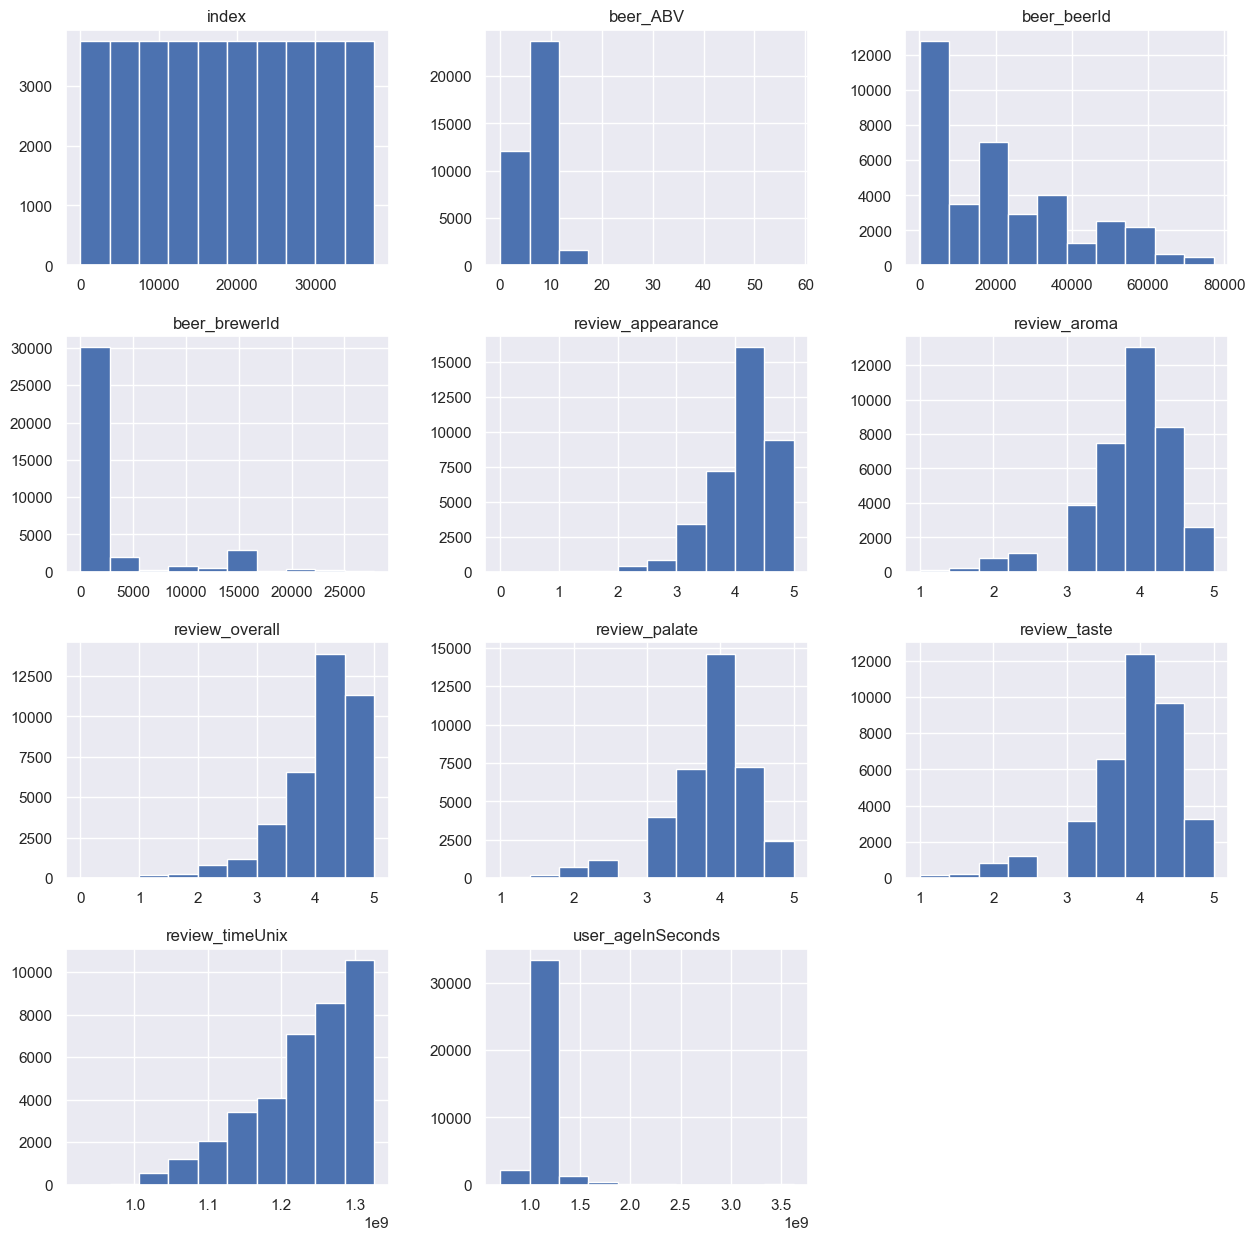

In [24]:
sns.set()
df.hist(figsize=(15,15));

<Axes: xlabel='review_overall', ylabel='count'>

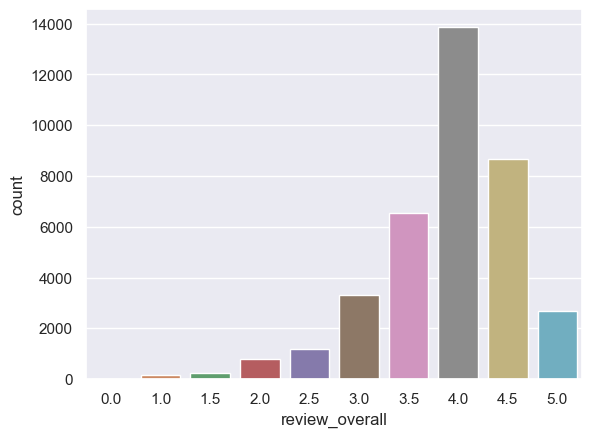

In [25]:
sns.countplot(x=df.review_overall)

# Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
df.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_aroma', 'review_overall',
       'review_palate', 'review_taste', 'review_text', 'review_timeStruct',
       'review_timeUnix', 'user_ageInSeconds', 'user_birthdayRaw',
       'user_birthdayUnix', 'user_gender', 'user_profileName'],
      dtype='object')

In [27]:
le1=LabelEncoder()
df.beer_name=le1.fit_transform(df.beer_name)

In [28]:
le2=LabelEncoder()
df.beer_style=le2.fit_transform(df.beer_style)

In [29]:
le3=LabelEncoder()
df.review_text=le3.fit_transform(df.review_text)

In [30]:
le4=LabelEncoder()
df.review_timeStruct=le4.fit_transform(df.review_timeStruct)

In [31]:
le5=LabelEncoder()
df.user_birthdayRaw=le5.fit_transform(df.user_birthdayRaw)

In [32]:
le6=LabelEncoder()
df.user_gender=le6.fit_transform(df.user_gender)

In [33]:
le7=LabelEncoder()
df.user_profileName=le7.fit_transform(df.user_profileName)

# Splitting Dataset into Train & Test

In [34]:
ip=df.drop('review_overall',axis=1)

In [35]:
op=df.review_overall

In [36]:
ip

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_palate,review_taste,review_text,review_timeStruct,review_timeUnix,user_ageInSeconds,user_birthdayRaw,user_birthdayUnix,user_gender,user_profileName
0,0,5.00,46634,14338,368,61,4.0,4.0,4.0,4.0,25893,20536,1229398690,1.176705e+09,1323,2.416303e+08,1,2332
1,1,11.00,3003,395,153,4,4.0,3.5,3.5,3.0,1593,20520,1218238738,1.176705e+09,1323,2.416303e+08,1,337
2,2,4.70,961,365,1044,14,3.5,4.0,3.5,3.5,14004,35854,1101492422,1.176705e+09,1323,2.416303e+08,1,5863
3,3,4.40,429,1,1174,35,3.0,3.0,3.0,3.0,14099,35716,1308532025,1.209827e+09,117,208508400.0,1,5805
4,4,4.40,4904,1417,230,46,4.0,3.0,3.5,2.5,8407,30019,1299912708,1.176705e+09,1323,2.416303e+08,1,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,37495,5.50,22450,3268,235,58,4.0,3.5,3.5,3.5,1011,32987,1207871761,1.176705e+09,1323,2.416303e+08,1,2353
37496,37496,8.50,7463,1199,589,85,4.5,4.0,4.5,4.5,3994,25668,1263102314,1.176705e+09,1323,2.416303e+08,1,5130
37497,37497,4.75,1154,394,1414,75,4.0,3.5,4.5,4.0,29784,14417,1067043816,1.176705e+09,1323,2.416303e+08,1,2940
37498,37498,11.20,19960,1199,615,11,4.0,4.0,5.0,5.0,25559,30332,1296330753,1.176705e+09,1323,2.416303e+08,1,2660


In [37]:
op

0        4.0
1        3.5
2        3.5
3        2.5
4        3.0
        ... 
37495    3.5
37496    3.5
37497    4.0
37498    4.0
37499    4.0
Name: review_overall, Length: 37500, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.8)

In [39]:
x_train.head()

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_palate,review_taste,review_text,review_timeStruct,review_timeUnix,user_ageInSeconds,user_birthdayRaw,user_birthdayUnix,user_gender,user_profileName
6959,6959,4.3,29145,263,34,74,3.0,4.0,3.5,4.0,4034,18852,1317130576,1.098454e+09,410,319881600.0,1,4100
25389,25389,6.6,1324,263,37,80,4.0,4.5,4.0,4.5,27363,21601,1303419885,1.176705e+09,1323,2.416303e+08,1,2650
1355,1355,5.4,23904,2647,298,22,3.5,3.0,3.0,2.0,17794,36858,1153814886,1.176705e+09,1323,2.416303e+08,1,1563
2133,2133,5.0,2106,394,1415,74,4.0,4.0,4.0,4.5,26933,34554,1023033559,1.176705e+09,1323,2.416303e+08,1,3039
5347,5347,6.5,962,365,1163,85,2.5,3.5,4.0,3.0,24776,24783,1249353878,1.006956e+09,498,411379200.0,1,5210


In [40]:
y_train.head()

6959     4.0
25389    4.5
1355     2.0
2133     4.5
5347     4.0
Name: review_overall, dtype: float64

# Feature Scalling

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [42]:
df.head()

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_text,review_timeStruct,review_timeUnix,user_ageInSeconds,user_birthdayRaw,user_birthdayUnix,user_gender,user_profileName
0,0,5.0,46634,14338,368,61,4.0,4.0,4.0,4.0,4.0,25893,20536,1229398690,1.176705e+09,1323,2.416303e+08,1,2332
1,1,11.0,3003,395,153,4,4.0,3.5,3.5,3.5,3.0,1593,20520,1218238738,1.176705e+09,1323,2.416303e+08,1,337
2,2,4.7,961,365,1044,14,3.5,4.0,3.5,3.5,3.5,14004,35854,1101492422,1.176705e+09,1323,2.416303e+08,1,5863
3,3,4.4,429,1,1174,35,3.0,3.0,2.5,3.0,3.0,14099,35716,1308532025,1.209827e+09,117,208508400.0,1,5805
4,4,4.4,4904,1417,230,46,4.0,3.0,3.0,3.5,2.5,8407,30019,1299912708,1.176705e+09,1323,2.416303e+08,1,535


# Model Building

# 1.Training-Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Prediction for all Test Data

In [44]:
pred=lr.predict(x_test)
pred

array([3.80927553, 3.67547448, 4.0167113 , ..., 4.15706682, 4.56817537,
       2.71098279])

# Model  Evaluation

In [45]:
from sklearn.metrics  import mean_squared_error,r2_score,mean_absolute_error
mae = mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse = np.sqrt(mse)
r2=r2_score(pred,y_test)

print("Mean Absolute Error:", mae)
print('r2_score:-',r2)
print("Root Mean Squared Error:", rmse)
print('mean squared error',mse)

Mean Absolute Error: 0.3058287276318302
r2_score:- 0.48932223220510596
Root Mean Squared Error: 0.4042374519955883
mean squared error 0.16340791759588555


# 2.Training-Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

# Prediction for all Test Data

In [47]:
pred=dt.predict(x_test)
pred

array([4.5, 4. , 4.5, ..., 4. , 4. , 2.5])

# Model Evaluation

In [48]:
from sklearn.metrics  import mean_squared_error,r2_score,mean_absolute_error
mae = mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse = np.sqrt(mse)
r2=r2_score(pred,y_test)

print("Mean Absolute Error:", mae)
print('r2_score:-',r2)
print("Root Mean Squared Error:", rmse)
print('mean squared error',mse)

Mean Absolute Error: 0.40826666666666667
r2_score:- 0.34958035025625944
Root Mean Squared Error: 0.5762233363317849
mean squared error 0.33203333333333335


# 3.Training-KNN Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor()
kr.fit(x_train,y_train)

KNeighborsRegressor()

# Prediction for all Test Data

In [50]:
pred=kr.predict(x_test)
pred

array([4. , 3.9, 3.9, ..., 4.1, 4.3, 3.2])

# Model Evaluation

In [51]:
from sklearn.metrics  import mean_squared_error,r2_score,mean_absolute_error
mae = mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse = np.sqrt(mse)
r2=r2_score(pred,y_test)

print("Mean Absolute Error:", mae)
print('r2_score:-',r2)
print("Root Mean Squared Error:", rmse)
print('mean squared error',mse)

Mean Absolute Error: 0.36187
r2_score:- 0.07451614861171163
Root Mean Squared Error: 0.4735331737763117
mean squared error 0.22423366666666664
